In [1]:
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
def lzw_compress(uncompressed: str) -> list:
    """Compress a string to a list of output symbols using LZW."""
    dict_size = 256
    dictionary = {chr(i): i for i in range(dict_size)}
    w = ""
    result = []

    for c in uncompressed:
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            result.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = c
    if w:
        result.append(dictionary[w])
    return result

In [3]:
def lzw_decompress(compressed: list) -> str:
    """Decompress a list of output symbols to a string."""
    dict_size = 256
    dictionary = {i: chr(i) for i in range(dict_size)}
    result = []

    w = chr(compressed.pop(0))
    result.append(w)

    for k in compressed:
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = w + w[0]
        else:
            raise ValueError("Bad compressed k: %s" % k)
        result.append(entry)
        dictionary[dict_size] = w + entry[0]
        dict_size += 1
        w = entry

    return "".join(result)

In [4]:
input_file = "human_vital_signs_dataset_2024.csv"  # Change this to your dataset file
df = pd.read_csv(input_file)
csv_data = df.to_csv(index=False)

In [5]:
df.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [6]:
compressed_file = "compressed_data.lzw"
decompressed_file = "decompressed_data.csv"

In [7]:
original_size = len(csv_data.encode("utf-8"))

In [8]:
start_time = time.time()
compressed_data = lzw_compress(csv_data)
compression_time = time.time() - start_time

In [9]:
with open(compressed_file, "wb") as f:
    pickle.dump(compressed_data, f)

In [10]:
compressed_size = os.path.getsize(compressed_file)

In [11]:
start_time = time.time()
with open(compressed_file, "rb") as f:
    loaded_data = pickle.load(f)
decompressed_data = lzw_decompress(loaded_data.copy())
decompression_time = time.time() - start_time

with open(decompressed_file, "w", encoding="utf-8") as f:
    f.write(decompressed_data)

decompressed_size = os.path.getsize(decompressed_file)
compression_ratio = original_size / compressed_size if compressed_size != 0 else 0

In [12]:
if csv_data.strip() == decompressed_data.strip():
    print("Data Verified: Original and Decompressed contents match.")
else:
    print("Data mismatch detected!")

Data Verified: Original and Decompressed contents match.



--- RESULTS (Using LZW Algorithm) ---
Original File: human_vital_signs_dataset_2024.csv
Compressed File: compressed_data.lzw
Decompressed File: decompressed_data.csv
Original File Size: 38485859 bytes
Compressed File Size: 24407004 bytes
Decompressed File Size: 38685880 bytes
Compression Ratio: 1.58
Compression Time: 26.5559 seconds
Decompression Time: 7.6739 seconds


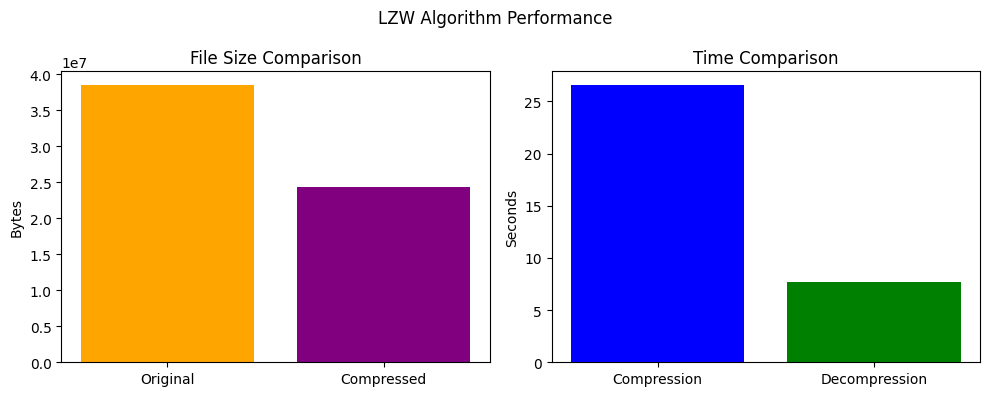

In [13]:
print("\n--- RESULTS (Using LZW Algorithm) ---")
print(f"Original File: {input_file}")
print(f"Compressed File: {compressed_file}")
print(f"Decompressed File: {decompressed_file}")
print(f"Original File Size: {original_size} bytes")
print(f"Compressed File Size: {compressed_size} bytes")
print(f"Decompressed File Size: {decompressed_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}")
print(f"Compression Time: {compression_time:.4f} seconds")
print(f"Decompression Time: {decompression_time:.4f} seconds")

plt.figure(figsize=(10, 4))

# --- File Size Comparison ---
plt.subplot(1, 2, 1)
labels = ['Original', 'Compressed']
sizes = [original_size, compressed_size]
plt.bar(labels, sizes, color=['orange', 'purple'])
plt.title('File Size Comparison')
plt.ylabel('Bytes')

# --- Time Comparison ---
plt.subplot(1, 2, 2)
time_labels = ['Compression', 'Decompression']
times = [compression_time, decompression_time]
plt.bar(time_labels, times, color=['blue', 'green'])
plt.title('Time Comparison')
plt.ylabel('Seconds')

plt.suptitle('LZW Algorithm Performance')
plt.tight_layout()
plt.show()